# Nodirbek Parpibaev / 20162030
# I did exercise 8
In this chapter we learned how to train deep neural networks. Problems like vanishing and exploding gradients are
analysed first and then solved using different initialization techniques. Then we learned how to reuse the layers
we trained before in our new model. We then learned different other optimizers and at the end learned
regularization rechniques to avoid overfitting

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# The vanishing and exploding gradients problems

In [2]:
def logit(z):
    return 1 / (1+np.exp(-z))


In [3]:
logit(15)

0.999999694097773

In [4]:
logit(100)

1.0

In [5]:
logit(2)

0.8807970779778823

In [6]:
logit(-14)

8.315280276641321e-07

In [7]:
logit(0)

0.5

Saving figure sigmoid_saturation_plot


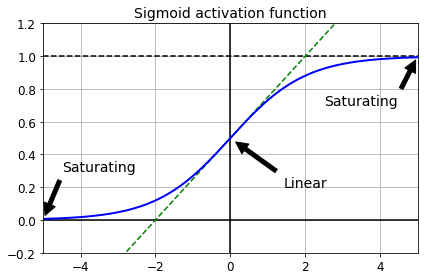

In [8]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

In [9]:
import random
dir(random)

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_accumulate',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_log',
 '_os',
 '_pi',
 '_random',
 '_repeat',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [10]:
import math
dir(math)

['__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'ceil',
 'comb',
 'copysign',
 'cos',
 'cosh',
 'degrees',
 'dist',
 'e',
 'erf',
 'erfc',
 'exp',
 'expm1',
 'fabs',
 'factorial',
 'floor',
 'fmod',
 'frexp',
 'fsum',
 'gamma',
 'gcd',
 'hypot',
 'inf',
 'isclose',
 'isfinite',
 'isinf',
 'isnan',
 'isqrt',
 'ldexp',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'log2',
 'modf',
 'nan',
 'perm',
 'pi',
 'pow',
 'prod',
 'radians',
 'remainder',
 'sin',
 'sinh',
 'sqrt',
 'tan',
 'tanh',
 'tau',
 'trunc']

In [11]:
help(math.gamma)

Help on built-in function gamma in module math:

gamma(x, /)
    Gamma function at x.



In [12]:
[name for name in dir(keras.initializers) if not name.startswith('_')]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [13]:
kernel_initializer = "he_uniform"
kernel_initializer = "he_normal"

keras.layers.Dense(10, activation="relu", kernel_initializer=kernel_initializer)

In [14]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform" )
keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)

# Nonsaturating activation functions

In [15]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)


Saving figure leaky_relu_plot


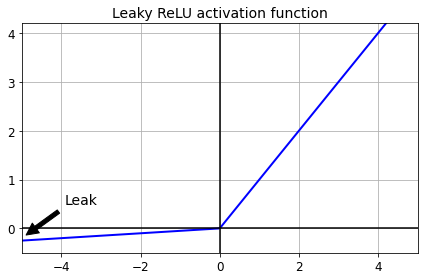

In [16]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()


In [17]:
[m for m in dir(keras.activations) if not m.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [18]:
help(keras.activations.elu)

Help on function elu in module tensorflow.python.keras.activations:

elu(x, alpha=1.0)
    Exponential Linear Unit.
    
    The exponential linear unit (ELU) with `alpha > 0` is:
    `x` if `x > 0` and
    `alpha * (exp(x) - 1)` if `x < 0`
    The ELU hyperparameter `alpha` controls the value to which an
    ELU saturates for negative net inputs. ELUs diminish the
    vanishing gradient effect.
    
    ELUs have negative values which pushes the mean of the activations
    closer to zero.
    Mean activations that are closer to zero enable faster learning as they
    bring the gradient closer to the natural gradient.
    ELUs saturate to a negative value when the argument gets smaller.
    Saturation means a small derivative which decreases the variation
    and the information that is propagated to the next layer.
    
    Example Usage:
    
    >>> import tensorflow as tf
    >>> model = tf.keras.Sequential()
    >>> model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='elu',
  

In [19]:
[m for m in dir(keras)]

['Input',
 'Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_sys',
 'activations',
 'applications',
 'backend',
 'callbacks',
 'constraints',
 'datasets',
 'estimator',
 'experimental',
 'initializers',
 'layers',
 'losses',
 'metrics',
 'mixed_precision',
 'models',
 'optimizers',
 'preprocessing',
 'regularizers',
 'utils',
 'wrappers']

In [20]:
help(keras.utils)

Help on package tensorflow.keras.utils in tensorflow.keras:

NAME
    tensorflow.keras.utils - Public API for tf.keras.utils namespace.

PACKAGE CONTENTS


FILE
    /home/nbp/python/my_env/lib/python3.8/site-packages/tensorflow/keras/utils/__init__.py




In [21]:
help(keras.losses)

Help on package tensorflow.keras.losses in tensorflow.keras:

NAME
    tensorflow.keras.losses - Built-in loss functions.

PACKAGE CONTENTS


FILE
    /home/nbp/python/my_env/lib/python3.8/site-packages/tensorflow/keras/losses/__init__.py




In [22]:
help(keras.models)

Help on package tensorflow.keras.models in tensorflow.keras:

NAME
    tensorflow.keras.models - Code for model cloning, plus model-related API entries.

PACKAGE CONTENTS


FILE
    /home/nbp/python/my_env/lib/python3.8/site-packages/tensorflow/keras/models/__init__.py




In [23]:
dir(keras.models)

['Model',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'clone_model',
 'load_model',
 'model_from_config',
 'model_from_json',
 'model_from_yaml',
 'save_model']

In [24]:
dir(keras.layers)

['AbstractRNNCell',
 'Activation',
 'ActivityRegularization',
 'Add',
 'AdditiveAttention',
 'AlphaDropout',
 'Attention',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'Concatenate',
 'Conv1D',
 'Conv1DTranspose',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM2D',
 'Convolution1D',
 'Convolution1DTranspose',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'Dense',
 'DenseFeatures',
 'DepthwiseConv2D',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalMaxPool2D',
 'GlobalMaxPool3D',
 'GlobalMaxPooling1D',
 'GlobalMaxPooling2D',
 'Global

In [25]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [26]:
help(keras.datasets.fashion_mnist.load_data)

Help on function load_data in module tensorflow.python.keras.datasets.fashion_mnist:

load_data()
    Loads the Fashion-MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST. The class labels are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |
    
    Returns:
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    
        **x_train, x_test**: uint8 arrays of grayscale image data with shape
          (num_samples, 28, 28).
    
        **y_train, y_test**: uint8 arrays of labels (integers in range 0-9)
          with shape (

In [27]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [28]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.17254902
  0.49803922 0.71372549 0.7254902  0.63137255 0.47058824 0.21568627
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.16470588 0.77647059 0.98431373
  1.         0.98431373 0.97647059 0.96862745 1.         0.98823529
  0.83921569 0.39215686 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.00784314 0.         0.         0.91372549 0

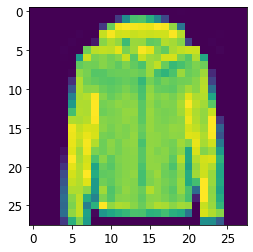

In [29]:
plt.imshow(X_train[0].reshape(28,28))

In [30]:
X_train.shape

(55000, 28, 28)

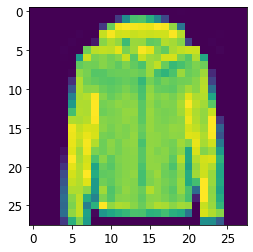

In [31]:
plt.imshow(X_train[0])

In [32]:
y_train[0]

4

In [33]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer = "he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])


In [34]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["accuracy"])


In [35]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5832 - accuracy: 0.8075 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5553 - accuracy: 0.8157 - val_loss: 0.5349 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5338 - accuracy: 0.8224 - val_loss: 0.5156 - val_accuracy:

In [36]:
history

In [37]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [38]:
history.history

{'loss': [1.281853437423706,
  0.7954745888710022,
  0.6816229224205017,
  0.6217381954193115,
  0.5831677317619324,
  0.555293083190918,
  0.5338411331176758,
  0.5172578692436218,
  0.5040416121482849,
  0.492436945438385],
 'accuracy': [0.6228545308113098,
  0.7361636161804199,
  0.7720727324485779,
  0.7943999767303467,
  0.8075090646743774,
  0.8156545162200928,
  0.8223999738693237,
  0.8271999955177307,
  0.8289636373519897,
  0.8320363759994507],
 'val_loss': [0.8886061310768127,
  0.7129992842674255,
  0.6426677703857422,
  0.5899770259857178,
  0.5581881999969482,
  0.5349481701850891,
  0.5156262516975403,
  0.5078612565994263,
  0.48947402834892273,
  0.4816479980945587],
 'val_accuracy': [0.7160000205039978,
  0.7656000256538391,
  0.7897999882698059,
  0.8065999746322632,
  0.8199999928474426,
  0.8238000273704529,
  0.8303999900817871,
  0.8284000158309937,
  0.8385999798774719,
  0.8396000266075134]}

In [39]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [40]:
tf.random.set_seed(42)

np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [41]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])


In [42]:
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8197 - accuracy: 0.7356 - val_loss: 0.7305 - val_accuracy: 0.7630
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6966 - accuracy: 0.7693 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6004 - val_accuracy: 0.8048
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5657 - val_accuracy: 0.8178
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5619 - accuracy: 0.8135 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5391 - accuracy: 0.8206 - val_loss: 0.5197 - val_accuracy:

In [43]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z)-1), z)

Saving figure elu_plot


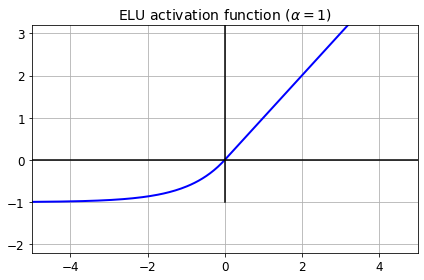

In [44]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5,5], [0,0], 'k-')
plt.plot([0,0], [-1,5], 'k-')
#plt.plot([0,0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
save_fig("elu_plot")
plt.show()

In [45]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [46]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


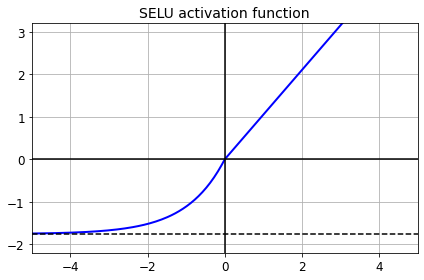

In [47]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5,5], [0,0], "k-")
plt.plot([-5,5], [-1.758, -1.758], "k--")
plt.plot([0,0], [-2.2, 3.2], "k-")
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5,5,-2.2, 3.2])
save_fig("selu_plot")
plt.show()

In [48]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [49]:
keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

In [50]:

np.random.seed(42)
tf.random.set_seed(42)

In [51]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [52]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [53]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train-pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [54]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 45s 26ms/step - loss: 1.3334 - accuracy: 0.4839 - val_loss: 0.9025 - val_accuracy: 0.6378
Epoch 2/5
1719/1719 [==============================] - 46s 27ms/step - loss: 0.8163 - accuracy: 0.6995 - val_loss: 0.6984 - val_accuracy: 0.7604
Epoch 3/5
1719/1719 [==============================] - 46s 27ms/step - loss: 0.6562 - accuracy: 0.7606 - val_loss: 0.7473 - val_accuracy: 0.7196
Epoch 4/5
1719/1719 [==============================] - 47s 27ms/step - loss: 0.5770 - accuracy: 0.7916 - val_loss: 0.5426 - val_accuracy: 0.8054
Epoch 5/5
1719/1719 [==============================] - 45s 26ms/step - loss: 0.5453 - accuracy: 0.8068 - val_loss: 0.5137 - val_accuracy: 0.8240


In [55]:
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [57]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [58]:
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 39s 23ms/step - loss: 1.8110 - accuracy: 0.2657 - val_loss: 1.3506 - val_accuracy: 0.3986
Epoch 2/5
1719/1719 [==============================] - 37s 22ms/step - loss: 1.1564 - accuracy: 0.5090 - val_loss: 1.0048 - val_accuracy: 0.5586
Epoch 3/5
1719/1719 [==============================] - 37s 22ms/step - loss: 0.9850 - accuracy: 0.5913 - val_loss: 0.9088 - val_accuracy: 0.6118
Epoch 4/5
1719/1719 [==============================] - 37s 22ms/step - loss: 0.8806 - accuracy: 0.6536 - val_loss: 0.7989 - val_accuracy: 0.7024
Epoch 5/5
1719/1719 [==============================] - 37s 22ms/step - loss: 0.8198 - accuracy: 0.6874 - val_loss: 0.8074 - val_accuracy: 0.6956


# Batch normalization

In [59]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_211 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_212 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_213 (Dense)            (None, 10)               

In [61]:
[m for m in dir(model) if not m.startswith('_')]

['activity_regularizer',
 'add',
 'add_loss',
 'add_metric',
 'add_update',
 'add_variable',
 'add_weight',
 'apply',
 'build',
 'built',
 'call',
 'compile',
 'compiled_loss',
 'compiled_metrics',
 'compute_mask',
 'compute_output_shape',
 'compute_output_signature',
 'count_params',
 'distribute_strategy',
 'dtype',
 'dynamic',
 'evaluate',
 'evaluate_generator',
 'fit',
 'fit_generator',
 'from_config',
 'get_config',
 'get_input_at',
 'get_input_mask_at',
 'get_input_shape_at',
 'get_layer',
 'get_losses_for',
 'get_output_at',
 'get_output_mask_at',
 'get_output_shape_at',
 'get_updates_for',
 'get_weights',
 'history',
 'inbound_nodes',
 'input',
 'input_mask',
 'input_names',
 'input_shape',
 'input_spec',
 'inputs',
 'layers',
 'load_weights',
 'losses',
 'make_predict_function',
 'make_test_function',
 'make_train_function',
 'metrics',
 'metrics_names',
 'name',
 'name_scope',
 'non_trainable_variables',
 'non_trainable_weights',
 'optimizer',
 'outbound_nodes',
 'output',
 '

In [62]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

In [63]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [64]:
model.layers[1].updates

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


[]

In [65]:
bn1 = model.layers[1]

In [66]:
bn1

In [67]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [68]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9021 - accuracy: 0.6946 - val_loss: 0.6012 - val_accuracy: 0.8004
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6103 - accuracy: 0.7904 - val_loss: 0.5175 - val_accuracy: 0.8240
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5540 - accuracy: 0.8078 - val_loss: 0.4802 - val_accuracy: 0.8354
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5171 - accuracy: 0.8211 - val_loss: 0.4558 - val_accuracy: 0.8454
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4936 - accuracy: 0.8275 - val_loss: 0.4398 - val_accuracy: 0.8492
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4771 - accuracy: 0.8339 - val_loss: 0.4274 - val_accuracy: 0.8520
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4641 - accuracy: 0.8384 - val_loss: 0.4155 - val_accuracy:

In [69]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    keras.layers.Activation("elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(10, activation="softmax")
])


In [70]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [71]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9068 - accuracy: 0.7005 - val_loss: 0.6415 - val_accuracy: 0.7854
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6318 - accuracy: 0.7860 - val_loss: 0.5528 - val_accuracy: 0.8140
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5725 - accuracy: 0.8034 - val_loss: 0.5122 - val_accuracy: 0.8282
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5350 - accuracy: 0.8161 - val_loss: 0.4860 - val_accuracy: 0.8360
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5100 - accuracy: 0.8223 - val_loss: 0.4677 - val_accuracy: 0.8422
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4938 - accuracy: 0.8270 - val_loss: 0.4529 - val_accuracy: 0.8460
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4805 - accuracy: 0.8337 - val_loss: 0.4409 - val_accuracy:

# Gradient Clipping

In [72]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="mse", optimizer=optimizer, metrics=["accuracy"])

In [73]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 8s 5ms/step - loss: 27.6627 - accuracy: 0.7358 - val_loss: 27.6285 - val_accuracy: 0.6170
Epoch 2/5
1719/1719 [==============================] - 8s 5ms/step - loss: 27.6400 - accuracy: 0.5072 - val_loss: 27.6090 - val_accuracy: 0.4282
Epoch 3/5
1719/1719 [==============================] - 8s 5ms/step - loss: 27.6268 - accuracy: 0.3701 - val_loss: 27.6012 - val_accuracy: 0.3482
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 27.6216 - accuracy: 0.3225 - val_loss: 27.5972 - val_accuracy: 0.3054
Epoch 5/5
1719/1719 [==============================] - 8s 5ms/step - loss: 27.6180 - accuracy: 0.2852 - val_loss: 27.5942 - val_accuracy: 0.2758


# Reusing pretrained layers

#### It is called transfer learning

In [74]:

def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [75]:
X_train_A.shape

(43986, 28, 28)

In [76]:
X_train_B.shape

(200, 28, 28)

In [77]:
y_train_A.shape

(43986,)

In [78]:
y_train_B.shape

(200,)

In [79]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [80]:
y_train_A

array([4, 0, 5, ..., 1, 3, 0], dtype=uint8)

In [81]:
y_train_B

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.], dtype=float32)

In [82]:
tf.random.set_seed(42)
np.random.seed(42)

In [83]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation = "selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))
    

In [84]:
model_A.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [85]:
history = model.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 6s 5ms/step - loss: 16.8171 - accuracy: 0.2461 - val_loss: 16.7828 - val_accuracy: 0.2464
Epoch 2/20
1375/1375 [==============================] - 6s 5ms/step - loss: 16.8160 - accuracy: 0.2290 - val_loss: 16.7820 - val_accuracy: 0.2362
Epoch 3/20
1375/1375 [==============================] - 6s 5ms/step - loss: 16.8154 - accuracy: 0.2194 - val_loss: 16.7815 - val_accuracy: 0.2312
Epoch 4/20
1375/1375 [==============================] - 6s 5ms/step - loss: 16.8150 - accuracy: 0.2114 - val_loss: 16.7811 - val_accuracy: 0.2210
Epoch 5/20
1375/1375 [==============================] - 6s 5ms/step - loss: 16.8147 - accuracy: 0.2084 - val_loss: 16.7809 - val_accuracy: 0.2172
Epoch 6/20
1375/1375 [==============================] - 6s 5ms/step - loss: 16.8145 - accuracy: 0.2060 - val_loss: 16.7807 - val_accuracy: 0.2165
Epoch 7/20
1375/1375 [==============================] - 6s 5ms/step - loss: 16.8143 - accuracy: 0.2035 - val_loss: 16.7805 -

In [86]:
model_A.save("my_model_A.h5")

In [87]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28,28]))
for n_hidden in (300, 100, 50,50,50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))


In [88]:
model_B.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [89]:
history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 41ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 17ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 17ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 17ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 16ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [90]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_214 (Dense)            (None, 300)               235200    
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_215 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
activation_1 (Activation)    (None, 100)              

In [91]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [92]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [93]:

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
    
model_B_on_A.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

In [94]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))


Epoch 1/4
7/7 [==============================] - 0s 38ms/step - loss: 0.8112 - accuracy: 0.5400 - val_loss: 0.8603 - val_accuracy: 0.5264
Epoch 2/4
7/7 [==============================] - 0s 16ms/step - loss: 0.8017 - accuracy: 0.5400 - val_loss: 0.8493 - val_accuracy: 0.5294
Epoch 3/4
7/7 [==============================] - 0s 16ms/step - loss: 0.7911 - accuracy: 0.5400 - val_loss: 0.8390 - val_accuracy: 0.5294
Epoch 4/4
7/7 [==============================] - 0s 16ms/step - loss: 0.7811 - accuracy: 0.5500 - val_loss: 0.8295 - val_accuracy: 0.5294


In [95]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
    
model_B_on_A.compile(loss="binary_crossentropy", optimizer = keras.optimizers.SGD(lr=1e-5), metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 0s 37ms/step - loss: 0.7741 - accuracy: 0.5500 - val_loss: 0.8265 - val_accuracy: 0.5314
Epoch 2/16
7/7 [==============================] - 0s 16ms/step - loss: 0.7710 - accuracy: 0.5550 - val_loss: 0.8230 - val_accuracy: 0.5314
Epoch 3/16
7/7 [==============================] - 0s 16ms/step - loss: 0.7675 - accuracy: 0.5550 - val_loss: 0.8198 - val_accuracy: 0.5335
Epoch 4/16
7/7 [==============================] - 0s 17ms/step - loss: 0.7643 - accuracy: 0.5550 - val_loss: 0.8167 - val_accuracy: 0.5345
Epoch 5/16
7/7 [==============================] - 0s 16ms/step - loss: 0.7612 - accuracy: 0.5600 - val_loss: 0.8136 - val_accuracy: 0.5355
Epoch 6/16
7/7 [==============================] - 0s 16ms/step - loss: 0.7580 - accuracy: 0.5650 - val_loss: 0.8105 - val_accuracy: 0.5355
Epoch 7/16
7/7 [==============================] - 0s 16ms/step - loss: 0.7549 - accuracy: 0.5700 - val_loss: 0.8076 - val_accuracy: 0.5365
Epoch 8/16
7/7 [===========

In [96]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.7826 - accuracy: 0.5550


[0.7825945019721985, 0.5550000071525574]

In [97]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 2ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

# Faster optimizers

Momentum optimization

In [98]:
optimizer = keras.optimizers.SGD(lr=1e-3 ,momentum=0.9)

In [99]:
import tensorflow
[m for m in dir(tensorflow) if not m.startswith('_')]

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 'abs',
 'acos',
 'acosh',
 'add',
 'add_n',
 'argmax',
 'argmin',
 'argsort',
 'as_dtype',
 'as_string',
 'asin',
 'asinh',
 'assert_equal',
 'assert_greater',
 'assert_less',
 'assert_rank',
 'atan',
 'atan2',
 'atanh',
 'audio',
 'autodiff',
 'autograph',
 'batch_to_space',
 'bfloat16',
 'bitcast',
 'bitwise',
 'bool',
 'boolean_mask',
 'broadcast_dynamic_shape',
 'broadcast_static_shape',
 'broadcast_to',
 'case',
 'cast',
 'clip_by_global_norm',
 'clip_by_norm',
 'clip_by_value',
 'compat',
 'compiler',
 'complex',
 'complex

Nesterov Accelerated Gradient

In [100]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [101]:
optimizer = keras.optimizers.RMSprop(lr = 0.001, rho=0.9)

Adam and Nadam optimization

In [102]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1 = 0.9, beta_2=0.999)

# Learning rate scheduling

Power scheduling

In [103]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [104]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [105]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4855 - accuracy: 0.8304 - val_loss: 0.4029 - val_accuracy: 0.8592
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3781 - accuracy: 0.8657 - val_loss: 0.3715 - val_accuracy: 0.8728
Epoch 3/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3459 - accuracy: 0.8770 - val_loss: 0.3750 - val_accuracy: 0.8752
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3251 - accuracy: 0.8831 - val_loss: 0.3501 - val_accuracy: 0.8796
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3103 - accuracy: 0.8890 - val_loss: 0.3448 - val_accuracy: 0.8780
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2968 - accuracy: 0.8934 - val_loss: 0.3414 - val_accuracy: 0.8828
Epoch 7/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2869 - accuracy: 0.8973 - val_loss: 0.3356 - val_accuracy:

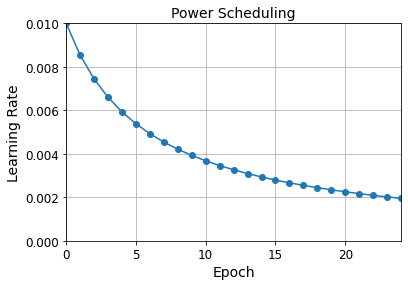

In [106]:
learning_rate=0.01
decay = 1e-4
batch_size=32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs, "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

# Exponential scheduling

In [107]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 * (epoch / 20)

In [108]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [109]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [110]:
n_epochs=25
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs = n_epochs, validation_data=(X_valid_scaled, y_valid),
                   callbacks = [lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8684 - accuracy: 0.7522 - val_loss: 0.8580 - val_accuracy: 0.7428
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6579 - accuracy: 0.8003 - val_loss: 0.5942 - val_accuracy: 0.8364
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6160 - accuracy: 0.8118 - val_loss: 0.9883 - val_accuracy: 0.7002
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5422 - accuracy: 0.8322 - val_loss: 0.5722 - val_accuracy: 0.8464
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4914 - accuracy: 0.8460 - val_loss: 0.4606 - val_accuracy: 0.8542
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4389 - accuracy: 0.8595 - val_loss: 0.5822 - val_accuracy: 0.8594
Epoch 7/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4074 - accuracy: 0.8721 - val_loss: 0.6018 - val_ac

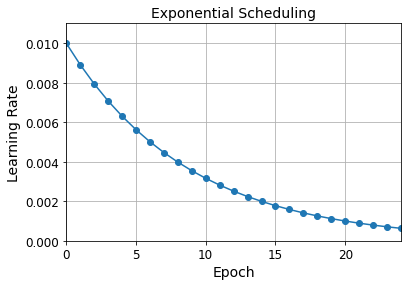

In [111]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [112]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [113]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 11s 7ms/step - loss: 0.7978 - accuracy: 0.7646 - val_loss: 0.6553 - val_accuracy: 0.7938
Epoch 2/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6316 - accuracy: 0.8057 - val_loss: 0.5717 - val_accuracy: 0.8138
Epoch 3/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5640 - accuracy: 0.8252 - val_loss: 0.5608 - val_accuracy: 0.8350
Epoch 4/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5099 - accuracy: 0.8377 - val_loss: 0.5302 - val_accuracy: 0.8384
Epoch 5/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4816 - accuracy: 0.8497 - val_loss: 0.5265 - val_accuracy: 0.8600
Epoch 6/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4135 - accuracy: 0.8645 - val_loss: 0.4516 - val_accuracy: 0.8612
Epoch 7/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3854 - accuracy: 0.8738 - val_loss: 0.4848 - val_ac

In [114]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

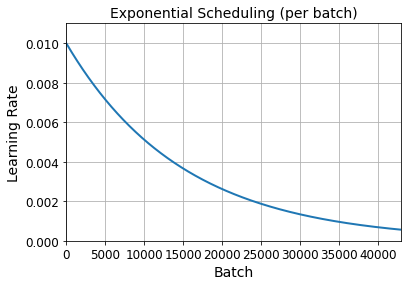

In [115]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

In [116]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [117]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [118]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8404 - accuracy: 0.7611 - val_loss: 0.8246 - val_accuracy: 0.7376
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8551 - accuracy: 0.7550 - val_loss: 0.9280 - val_accuracy: 0.7790
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8227 - accuracy: 0.7698 - val_loss: 1.2534 - val_accuracy: 0.6248
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.8941 - accuracy: 0.7491 - val_loss: 0.8271 - val_accuracy: 0.7564
Epoch 5/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8314 - accuracy: 0.7657 - val_loss: 0.7804 - val_accuracy: 0.7688
Epoch 6/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5241 - accuracy: 0.8385 - val_loss: 0.5715 - val_accuracy: 0.8384
Epoch 7/25
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4909 - accuracy: 0.8492 - val_loss: 0.5668 - val_ac

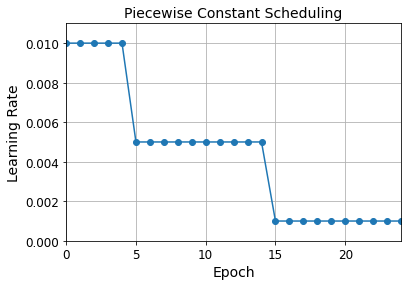

In [119]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [120]:
tf.random.set_seed(42)
np.random.seed(42)

In [121]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5926 - accuracy: 0.8067 - val_loss: 0.5334 - val_accuracy: 0.8420
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4975 - accuracy: 0.8405 - val_loss: 0.6172 - val_accuracy: 0.8328
Epoch 3/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5155 - accuracy: 0.8418 - val_loss: 0.4847 - val_accuracy: 0.8572
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5091 - accuracy: 0.8466 - val_loss: 0.4885 - val_accuracy: 0.8512
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5214 - accuracy: 0.8487 - val_loss: 0.4856 - val_accuracy: 0.8502
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4952 - accuracy: 0.8551 - val_loss: 0.6020 - val_accuracy: 0.8564
Epoch 7/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5357 - accuracy: 0.8525 - val_loss: 0.5277 - val_accuracy:

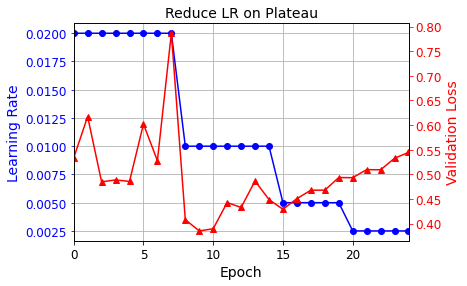

In [122]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

In [123]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4894 - accuracy: 0.8275 - val_loss: 0.4094 - val_accuracy: 0.8600
Epoch 2/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3819 - accuracy: 0.8650 - val_loss: 0.3738 - val_accuracy: 0.8684
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3487 - accuracy: 0.8767 - val_loss: 0.3733 - val_accuracy: 0.8690
Epoch 4/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3264 - accuracy: 0.8836 - val_loss: 0.3493 - val_accuracy: 0.8806
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3104 - accuracy: 0.8897 - val_loss: 0.3429 - val_accuracy: 0.8792
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2958 - accuracy: 0.8954 - val_loss: 0.3415 - val_accuracy: 0.8810
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2854 - accuracy: 0.8989 - val_loss: 0.3354 - val_accuracy:

In [124]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

In [125]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [126]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.3861


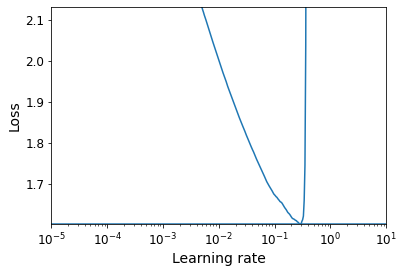

In [127]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

# Avoiding overfitting using regularization

In [129]:
layer = keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01))

In [131]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01))
])


In [132]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [133]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 13s 8ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


In [134]:
from functools import partial
RegularizedDense = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal", kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax", kernel_initializer="glorot_uniform")
])

In [135]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [136]:
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 13s 8ms/step - loss: 1.5816 - accuracy: 0.8115 - val_loss: 0.7197 - val_accuracy: 0.8302
Epoch 2/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7210 - accuracy: 0.8276 - val_loss: 0.6862 - val_accuracy: 0.8360
Epoch 3/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7013 - accuracy: 0.8329 - val_loss: 0.7035 - val_accuracy: 0.8314
Epoch 4/5
1719/1719 [==============================] - 13s 7ms/step - loss: 0.6942 - accuracy: 0.8360 - val_loss: 0.6775 - val_accuracy: 0.8442
Epoch 5/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6898 - accuracy: 0.8382 - val_loss: 0.6615 - val_accuracy: 0.8478


In [137]:
# Dropout


In [139]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [140]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


In [141]:
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5838 - accuracy: 0.7997 - val_loss: 0.3730 - val_accuracy: 0.8644
Epoch 2/5
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4209 - accuracy: 0.8442 - val_loss: 0.3395 - val_accuracy: 0.8720
Epoch 3/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3912 - accuracy: 0.8538 - val_loss: 0.3482 - val_accuracy: 0.8706
Epoch 4/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3746 - accuracy: 0.8628 - val_loss: 0.3200 - val_accuracy: 0.8804
Epoch 5/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3591 - accuracy: 0.8667 - val_loss: 0.3029 - val_accuracy: 0.8872


In [142]:
# Alpha dropout

In [143]:
tf.random.set_seed(42)
np.random.seed(42)

In [144]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [145]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True),
             metrics=["accuracy"])

In [146]:
model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6654 - accuracy: 0.7599 - val_loss: 0.5948 - val_accuracy: 0.8418
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5608 - accuracy: 0.7931 - val_loss: 0.5543 - val_accuracy: 0.8404
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5284 - accuracy: 0.8053 - val_loss: 0.4834 - val_accuracy: 0.8588
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5070 - accuracy: 0.8110 - val_loss: 0.4605 - val_accuracy: 0.8602
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4922 - accuracy: 0.8175 - val_loss: 0.4584 - val_accuracy: 0.8578
Epoch 6/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4869 - accuracy: 0.8188 - val_loss: 0.4686 - val_accuracy: 0.8616
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4717 - accuracy: 0.8249 - val_loss: 0.4632 - val_accuracy:

In [148]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4475 - accuracy: 0.8684


[0.4475307762622833, 0.868399977684021]

In [149]:
model.evaluate(X_train_scaled, y_train)

1719/1719 [==============================] - 5s 3ms/step - loss: 0.3346 - accuracy: 0.8876


[0.334622323513031, 0.8875818252563477]

In [150]:
history = model.fit(X_train_scaled, y_train)

1719/1719 [==============================] - 9s 5ms/step - loss: 0.4169 - accuracy: 0.8453


In [151]:
# MC dropout

In [152]:
tf.random.set_seed(42)
np.random.seed(42)

In [153]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [154]:
y_probas.shape

(100, 10000, 10)

In [161]:
temp = model(X_test_scaled)

In [167]:
np.round(model.predict(X_test_scaled[:1]), 1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [171]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.11, 0.  , 0.67]],
      dtype=float32)

In [173]:
y_pred = np.argmax(y_proba, axis=1)

In [174]:
accuracy = np.sum(y_pred == y_test) / len(y_test)

In [175]:
accuracy

0.8674

In [176]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    
class MAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [177]:
tf.random.set_seed(42)
np.random.seed(42)

In [178]:
mc_model = keras.models.Sequential([
    MAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model.layers
])

In [179]:
mc_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
m_alpha_dropout (MAlphaDropo (None, 784)               0         
_________________________________________________________________
dense_265 (Dense)            (None, 300)               235500    
_________________________________________________________________
m_alpha_dropout_1 (MAlphaDro (None, 300)               0         
_________________________________________________________________
dense_266 (Dense)            (None, 100)               30100     
_________________________________________________________________
m_alpha_dropout_2 (MAlphaDro (None, 100)               0         
_________________________________________________________________
dense_267 (Dense)            (None, 10)              

In [180]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [181]:
mc_model.set_weights(model.get_weights())

In [182]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.19, 0.  , 0.58]],
      dtype=float32)

In [183]:
# Max Norm

In [184]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                          kernel_constraint=keras.constraints.max_norm(1.0))

In [185]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4736 - accuracy: 0.8329 - val_loss: 0.3756 - val_accuracy: 0.8650
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3536 - accuracy: 0.8718 - val_loss: 0.3741 - val_accuracy: 0.8680


# Exercises

In [186]:
# Exercise 8

a.

In [230]:
cifar = keras.datasets.cifar10

In [231]:
(X_train, y_train), (X_test, y_test) = cifar.load_data()

In [232]:
X_train.shape

(50000, 32, 32, 3)

In [233]:
y_train.shape

(50000, 1)

In [234]:
X_test.shape

(10000, 32, 32, 3)

In [235]:
y_test.shape

(10000, 1)

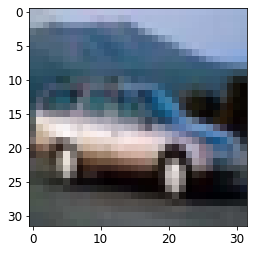

In [236]:
plt.imshow(X_train[4])

In [237]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 5000)

In [238]:
X_train.shape

(45000, 32, 32, 3)

In [239]:
X_valid.shape

(5000, 32, 32, 3)

In [240]:
y_valid.shape

(5000, 1)

In [241]:
y_train.shape

(45000, 1)

In [242]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32,3]))
for i in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

b.

In [243]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [244]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), callbacks=keras.callbacks.EarlyStopping(patience=5))

Epoch 1/20
1407/1407 [==============================] - 13s 9ms/step - loss: 3.5964 - accuracy: 0.2135 - val_loss: 2.0314 - val_accuracy: 0.2366
Epoch 2/20
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9409 - accuracy: 0.2782 - val_loss: 2.1590 - val_accuracy: 0.2108
Epoch 3/20
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9079 - accuracy: 0.2980 - val_loss: 1.9743 - val_accuracy: 0.2858
Epoch 4/20
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8839 - accuracy: 0.3057 - val_loss: 2.1097 - val_accuracy: 0.2622
Epoch 5/20
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8714 - accuracy: 0.3094 - val_loss: 1.9919 - val_accuracy: 0.2766
Epoch 6/20
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8655 - accuracy: 0.3110 - val_loss: 1.8630 - val_accuracy: 0.3354
Epoch 7/20
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8547 - accuracy: 0.3169 - val_loss: 1.8454 - val_ac

In [245]:
print()

In [246]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))

In [247]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [248]:
optimizer = keras.optimizers.Nadam(lr=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [249]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [250]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [251]:
%tensorboard --logdir=./my_cifar10_logs --port=6006


In [252]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
   1/1407 [..............................] - ETA: 0s - loss: 165.9660 - accuracy: 0.0625WARNING:tensorflow:From /home/nbp/python/my_env/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1407/1407 [==============================] - 20s 14ms/step - loss: 4.1223 - accuracy: 0.1634 - val_loss: 2.1409 - val_accuracy: 0.2070
Epoch 2/100
1407/1407 [==============================] - 19s 14ms/step - loss: 2.0661 - accuracy: 0.2394 - val_loss: 2.0524 - val_accuracy: 0.2472
Epoch 3/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.9438 - accuracy: 0.2832 - val_loss: 2.0031 - val_accuracy: 0.2582
Epoch 4/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.8642 - accuracy: 0.3209 - val_loss: 1.9517 - val_accuracy: 0.3268
Epoch 5/100
1407/1407 [==========

1407/1407 [==============================] - 13s 9ms/step - loss: 1.1637 - accuracy: 0.5831 - val_loss: 1.5760 - val_accuracy: 0.4722
Epoch 53/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.1578 - accuracy: 0.5847 - val_loss: 1.5421 - val_accuracy: 0.4832
Epoch 54/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.1533 - accuracy: 0.5880 - val_loss: 1.5801 - val_accuracy: 0.4644
Epoch 55/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.1462 - accuracy: 0.5884 - val_loss: 1.5417 - val_accuracy: 0.4858


In [253]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 25s 18ms/step - loss: 1.8430 - accuracy: 0.3392 - val_loss: 1.6996 - val_accuracy: 0.3886
Epoch 2/100
1407/1407 [==============================] - 23s 16ms/step - loss: 1.6650 - accuracy: 0.4079 - val_loss: 1.6365 - val_accuracy: 0.4200
Epoch 3/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5964 - accuracy: 0.4312 - val_loss: 1.5578 - val_accuracy: 0.4404
Epoch 4/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5460 - accuracy: 0.4497 - val_loss: 1.5259 - val_accuracy: 0.4644
Epoch 5/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.5037 - accuracy: 0.4675 - val_loss: 1.4335 - val_accuracy: 0.4848
Epoch 6/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.4673 - accuracy: 0.4782 - val_loss: 1.4255 - val_accuracy: 0.4954
Epoch 7/100
1407/1407 [==============================] - 22s 16ms/step - loss: 1.4345 - accuracy: 0.4893 - val_loss: 1

[1.313596248626709, 0.0835999995470047]

In [254]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.9175 - accuracy: 0.3111 - val_loss: 1.8943 - val_accuracy: 0.3338
Epoch 2/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6990 - accuracy: 0.3988 - val_loss: 1.8077 - val_accuracy: 0.3574
Epoch 3/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6011 - accuracy: 0.4342 - val_loss: 1.6559 - val_accuracy: 0.4116
Epoch 4/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5363 - accuracy: 0.4577 - val_loss: 1.6053 - val_accuracy: 0.4442
Epoch 5/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4797 - accuracy: 0.4791 - val_loss: 1.5847 - val_accuracy: 0.4450
Epoch 6/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4313 - accuracy: 0.4973 - val_loss: 1.5296 - val_accuracy: 0.4606
Epoch 7/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.3906 - accuracy: 0.5130 - val_loss: 1.5292 -

[1.4814050197601318, 0.12460000067949295]

In [255]:
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 1.4814 - accuracy: 0.1246


[1.4814050197601318, 0.12460000067949295]

In [256]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.8947 - accuracy: 0.3243 - val_loss: 1.7524 - val_accuracy: 0.3714
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.6691 - accuracy: 0.4097 - val_loss: 1.6590 - val_accuracy: 0.4134
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5778 - accuracy: 0.4465 - val_loss: 1.6506 - val_accuracy: 0.4228
Epoch 4/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5073 - accuracy: 0.4695 - val_loss: 1.5762 - val_accuracy: 0.4494
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4461 - accuracy: 0.4941 - val_loss: 1.5479 - val_accuracy: 0.4628
Epoch 6/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4070 - accuracy: 0.5105 - val_loss: 1.4997 - val_accuracy: 0.4732
Epoch 7/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.3633 - accuracy: 0.5264 - val_loss: 1.5185 

[1.4871546030044556, 0.1273999959230423]

In [257]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [258]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])


In [259]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [260]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.4942

In [261]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(lr=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

352/352 [==============================] - 7s 19ms/step - loss: nan - accuracy: 0.1406


(9.999999747378752e-06,
 9.999868392944336,
 2.6111679077148438,
 4.005105154854911)

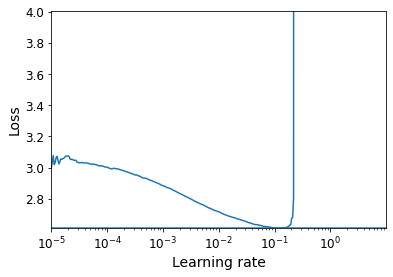

In [262]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [263]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(lr=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [266]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [267]:
n_epochs = 15
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 7s 21ms/step - loss: 2.0553 - accuracy: 0.2853 - val_loss: 1.8032 - val_accuracy: 0.3652
Epoch 2/15
352/352 [==============================] - 7s 20ms/step - loss: 1.7630 - accuracy: 0.3790 - val_loss: 1.6385 - val_accuracy: 0.4296
Epoch 3/15
352/352 [==============================] - 7s 19ms/step - loss: 1.6227 - accuracy: 0.4225 - val_loss: 1.6041 - val_accuracy: 0.4326
Epoch 4/15
352/352 [==============================] - 7s 21ms/step - loss: 1.5435 - accuracy: 0.4506 - val_loss: 1.6299 - val_accuracy: 0.4304
Epoch 5/15
352/352 [==============================] - 8s 21ms/step - loss: 1.4928 - accuracy: 0.4699 - val_loss: 1.5763 - val_accuracy: 0.4452
Epoch 6/15
352/352 [==============================] - 7s 20ms/step - loss: 1.4535 - accuracy: 0.4798 - val_loss: 1.5464 - val_accuracy: 0.4692
Epoch 7/15
352/352 [==============================] - 7s 21ms/step - loss: 1.4130 - accuracy: 0.4991 - val_loss: 1.5938 - val_accuracy: 0.4572